<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#GDP,-Deflator,-Current-and-Constant-Prices" data-toc-modified-id="GDP,-Deflator,-Current-and-Constant-Prices-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GDP, Deflator, Current and Constant Prices</a></span></li><li><span><a href="#Index-numbers" data-toc-modified-id="Index-numbers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Index numbers</a></span><ul class="toc-item"><li><span><a href="#Base-weighting---Laspeyres-index" data-toc-modified-id="Base-weighting---Laspeyres-index-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Base weighting - Laspeyres index</a></span></li><li><span><a href="#Current-weighting---Paasche-index" data-toc-modified-id="Current-weighting---Paasche-index-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Current weighting - Paasche index</a></span></li><li><span><a href="#Chaining-index-numbers" data-toc-modified-id="Chaining-index-numbers-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Chaining index numbers</a></span></li></ul></li><li><span><a href="#Percentages" data-toc-modified-id="Percentages-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Percentages</a></span><ul class="toc-item"><li><span><a href="#growth-rates" data-toc-modified-id="growth-rates-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>growth rates</a></span><ul class="toc-item"><li><span><a href="#Annualised-change." data-toc-modified-id="Annualised-change.-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Annualised change.</a></span></li><li><span><a href="#annual-rate-for-several-years" data-toc-modified-id="annual-rate-for-several-years-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>annual rate for several years</a></span></li><li><span><a href="#monthly-rate-derived-from-annual-rate" data-toc-modified-id="monthly-rate-derived-from-annual-rate-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>monthly rate derived from annual rate</a></span></li></ul></li></ul></li><li><span><a href="#Seasonal-adjustment---Moving-averages" data-toc-modified-id="Seasonal-adjustment---Moving-averages-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Seasonal adjustment - Moving averages</a></span></li></ul></div>

In [4]:
import pandas as pd

# GDP, Deflator, Current and Constant Prices

In [8]:
# current prices are in the nominal prices of a given year
# constant prices are measured by the prices of the base year
current_prices = pd.DataFrame( {
    "year": [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005 ], 
    "current prices": [7816.9, 8304.3, 8747.0, 9268.4, 9817.0, 10128.0, 10469.6, 10971.2, 11734.3, 12487.1],
    "constant prices": [8328.9, 8703.5, 9066.9, 9470.3, 9817.0, 9890.7, 10048.8, 10320.6, 10755.7, 11134.8 ]}).set_index("year")

In [10]:
# function that fetches the base year value against which the price levels of other year are compared
def reference_base(year):
    rb = current_prices[current_prices.index == year]["current prices"].iat[0]
    return rb/100

# price deﬂator = Current prices divided by constant prices ( *100)  - inflation rate
current_prices["price deflator"] =\
((current_prices["current prices"]/current_prices["constant prices"])*100).round(1)

# current price index = Constant prices divided by the value of the reference year/100
# index number that shows the nominal development of the prices relative (to base year)
current_prices["current price index"] = current_prices["current prices"]/reference_base(2000).round(3)

# current price index  = Constant prices divided by value of the reference year/100 
# index number that shows the real development of the prices relative (to base year) 
current_prices["constant price index"] = \
(current_prices["constant prices"]/reference_base(2000)).round(3)
current_prices

,current prices,constant prices,price deflator,current price index,constant price index
year,,,,,
1996,7816.9,8328.9,93.9,79.626159,84.842
1997,8304.3,8703.5,95.4,84.591016,88.657
1998,8747.0,9066.9,96.5,89.100540,92.359
1999,9268.4,9470.3,97.9,94.411735,96.468
2000,9817.0,9817.0,100.0,100.000000,100.000
2001,10128.0,9890.7,102.4,103.167974,100.751
2002,10469.6,10048.8,104.2,106.647652,102.361
2003,10971.2,10320.6,106.3,111.757156,105.130
2004,11734.3,10755.7,109.1,119.530406,109.562


# Index numbers

## Base weighting - Laspeyres index
The index takes the quantities of a base year and calculates the value of the same quantities at different times and price levels - the index is calculated by dividing the expenditure of diffrentely prices but equaly weight baskets of different years with the base years expenditure.

In [161]:
wine_cheese = pd.DataFrame({
                "prices in 1995": [9, 5,], 
                "prices in 2005":[10.5, 8],
                "Quantity 1995": [5,2],
                "Quantity 2005": [6,3]},
                index=["Wine", "Cheese"])
wine_cheese

,prices in 1995,prices in 2005,Quantity 1995,Quantity 2005
Wine,9,10.5,5,6
Cheese,5,8.0,2,3


In [178]:
# weekly expenditure in quantity * prices of 1995
expenditure_1995 = (wine_cheese["prices in 1995"]*wine_cheese["Quantity 1995"]).sum()
# weekly expenditure in 2005 with 1995 quantities but at 2005 prices
expenditure_2005 = (wine_cheese["prices in 2005"]*wine_cheese["Quantity 1995"]).sum()

In [180]:
# calculate the index
base_weight = pd.DataFrame({"index 1995": [(expenditure_1995/expenditure_1995)*100],
                                                   "index 2005":[(expenditure_2005/expenditure_1995)*100]}).round(1).T
base_weight

,0
index 1995,100.0
index 2005,124.5


## Current weighting - Paasche index
Weighted averages need revising the weights from time to time.</br>
One way to proceed is to calculate a new set of current weights (quantities) at regular intervals. </br>
This is known as a current-weighted index, or Paasche index. 


In [182]:
# weekly expenditure in current (2005) quantity  * prices of 1995
current_expenditure_1995 = (wine_cheese["prices in 1995"]*wine_cheese["Quantity 2005"]).sum()
# weekly expenditure in 2005 quantities and 2005 prices
current_expenditure_2005 = (wine_cheese["prices in 2005"]*wine_cheese["Quantity 2005"]).sum()

In [183]:
# calculate the index
current_weight= pd.DataFrame({"index 1995": [(current_expenditure_1995/current_expenditure_1995)*100],
                                                    "index 2005":[(current_expenditure_2005/current_expenditure_1995)*100]}).round(1).T
current_weight

,0
index 1995,100.0
index 2005,126.1


1. Base-weighted indices tend to overstate changes over time. </br>
2. Current-weighted indices understate long-term changes. </br>
- Current-weighted price indices reﬂect changes in both prices and relative volumes, while </br>
- base-weighted versions record price changes only.</br></br>
Most commonly indices are a combination of base-weighted and current-weighted. </br>
A new set of weights might be introduced every ﬁve years or so and the new index then spliced or chained to the old index.

## Chaining index numbers
1.  Identify one period when there are ﬁgures for both indices; here its 2002 
2.  For this period, divide the new ﬁgure by old ﬁgure;  83 / 133 = 0.62.
3.  Multiply all old ﬁgures by the result; each ﬁgure in column 3 = ﬁgure in column A * 0.62.
4.  Put the rebased data with the new ﬁgures to create one long run of data.

In [206]:
chain_index = pd.DataFrame( {
    "year": [1999, 2000, 2001, 2002, 2003, 2004, 2005], 
    "old index": [100, 110, 121, 133, 0, 0,  0],
    "new index": [0, 0, 0, 83, 91, 100, 110]}).set_index("year")
chain_index

,old index,new index
year,,
1999,100,0
2000,110,0
2001,121,0
2002,133,83
2003,0,91
2004,0,100
2005,0,110


to bring both index on the same level 133*x=83 -> x=83/133=0.62

In [216]:
rebase = 83/133
chain_index["old index rebased"] = (chain_index["old index"]*rebase).round(1)
chain_index["chained index"] = chain_index.iloc[0:3,2].append(chain_index.iloc[3:,1])
chain_index

,old index,new index,old index rebased,chained index
year,,,,
1999,100,0,62.4,62.4
2000,110,0,68.6,68.6
2001,121,0,75.5,75.5
2002,133,83,83.0,83.0
2003,0,91,0.0,91.0
2004,0,100,0.0,100.0
2005,0,110,0.0,110.0


# Percentages

In [237]:
def percentage_of(x,y):
    percent = int((y/x)*100)
    return f"{y} is {percent}% of {x}"

percentage_of(150, 120)

'120 is 80% of 150'

In [235]:
def percentage_change(x, y):
        change = int(((y/x)-1)*100)
        return f"the change from {x} to {y} is {change}% of {x}"

In [236]:
percentage_change(70, 90)

'the change from 70 to 90 is 28% of 70'

In [264]:
def percentage_change(x, y):
        change =round( (((y/x)-1)*100), 1)
        return f"the change from {x} to {y} is {change}% of {x}"
    
percentage_change(1, 1.103)

'the change from 1 to 1.103 is 10.3% of 1'

In [241]:
def growth_by_percent(x,p):
    return f"{x} increased by {p}% is {x*((p/100)+1)}"

growth_by_percent(120, 25)

'120 increased by 25% is 150.0'

In [247]:
def reduce_by_percent(x,p):
    return f"{x} reduced by {p}% is {x*(1-(p/100))}"

reduce_by_percent(150, 20)

'150 reduced by 20% is 120.0'

## growth rates
over several periods when the rate over one period is known

### Annualised change. 
- monthly rate is known - what is the annual rate when the rate stays like this for 12 month?</br>
- This is the change which would occur if the movement observed in any period were to continue for exactly</br>
12 months. For example, orders rose 6.4% annualised during the ﬁrst three quarters of 2006.</br>

In [13]:
def annualised_change(r_monthly):
    return ((((r_monthly/100)+1)**12)-1)*100

annualised_change(0.3)

3.659998028813005

### annual rate for several years
- when the annual rate (r_annual) is known - what is the rate when this rate would continue to be the case for x years?

In [269]:
def x_year_growth(r_annual, x):
    return ((((r_annual/100)+1)**x)-1)*100

x_year_growth(7.5, 10)

106.1031562164711

###  monthly rate derived from annual rate
growth rate over one period when the rate over several periods is known

In [272]:
def yrate_to_mrate(r_year):
    return ((((r_year/100)+1)**(1/12))-1)*100

yrate_to_mrate(3.7)

0.3032248764614831

annual rate derived from rate observed over several years

In [280]:
def annual_rate(r_several, years):
    return (((r_several/100)+1)**(1/years)-1)*100
            
            
annual_rate(106.1, 10)

7.499835375830699

# Seasonal adjustment - Moving averages

In [14]:
import pandas as pd
import eurostat

In [264]:
# get monthly oil prices from eurostat
oil = eurostat.get_data_df("nrg_cb_cosm", flags=False)

In [265]:
# select unit, country and import
eu_oil_imp = oil[(oil["indic_nrg"]=="AVGPRC_USD_BBL")\
                        & (oil[r"geo\time"]=="DE")\
                        & (oil["nrg_bal"] == "IMP")].T

In [8]:
# get rid of summary values 
a = eu_oil_imp["2021M11":"2021M01"]
b = eu_oil_imp["2020M12":"2020M01"]
c =  eu_oil_imp["2019M12":"2018M11"]

# concatenate series
oil_imp = pd.concat([a, b,c])

# rename the column
oil_imp = oil_imp.rename(columns={4: "oil prices"})

In [9]:
# reverse data order
oil_rev = oil_imp[::-1].copy()
oil_rev

,oil prices
2018M11,67.66
2018M12,58.6
2019M01,59.48
2019M02,63.41
2019M03,64.93
2019M04,70.5
2019M05,71.79
2019M06,66.16
2019M07,65.04
2019M08,60.5


In [10]:
# function that calculates the monthly growth rate
def percentage_change(before, after):
    return (((after/before)-1))*100

In [11]:
#  how much did the price in one month grow in percent of the value of the month before
oil_rev["% monthly change"] = percentage_change(oil_rev["oil prices"].shift(1), oil_rev["oil prices"])

#  what would the compounded percentage change be if the monthly rate would stay like this for 12 month
oil_rev["one month % change annualised"] = annualised_change(oil_rev["% monthly change"])

# how much did the price grow over 12 month in % of  the price 12 month past
oil_rev["% change over 12 month"] = percentage_change(oil_rev["oil prices"].shift(12), oil_rev["oil prices"])

# moving average - the concerning month's price is decribed as a average of the surrounding month's prices to smooth fluctuations
oil_rev["3 month moving average"] = ((oil_rev["oil prices"].shift(1) \
                                                           +oil_rev["oil prices"] \
                                                            +oil_rev["oil prices"].shift(-1))/3).astype(float).round(2)

In [54]:
oil_rev["5 month moving average"] = ((oil_rev["oil prices"].shift(2) 
                                                             + oil_rev["oil prices"].shift(1) \
                                                             +oil_rev["oil prices"] \
                                                             +oil_rev["oil prices"].shift(-1)\
                                                             + oil_rev["oil prices"].shift(-2))/5).astype(float).round(2)

In [55]:
oil_rev[:10]

,oil prices,% monthly change,one month % change annualised,% change over 12 month,3 month moving average,5 month moving average
2018M11,67.66,NaN,NaN,NaN,NaN,NaN
2018M12,58.6,-13.390482,-82.184933,NaN,61.91,NaN
2019M01,59.48,1.501706,19.585941,NaN,60.50,62.82
2019M02,63.41,6.607263,115.497145,NaN,62.61,63.38
2019M03,64.93,2.397098,32.877606,NaN,66.28,66.02
2019M04,70.5,8.578469,168.487808,NaN,69.07,67.36
2019M05,71.79,1.829787,24.307701,NaN,69.48,67.68
2019M06,66.16,-7.842318,-62.470004,NaN,67.66,66.80
2019M07,65.04,-1.692866,-18.525739,NaN,63.90,65.01
2019M08,60.5,-6.98032,-58.033949,NaN,62.36,62.71


In [28]:
import matplotlib.pyplot as plt
import numpy as np

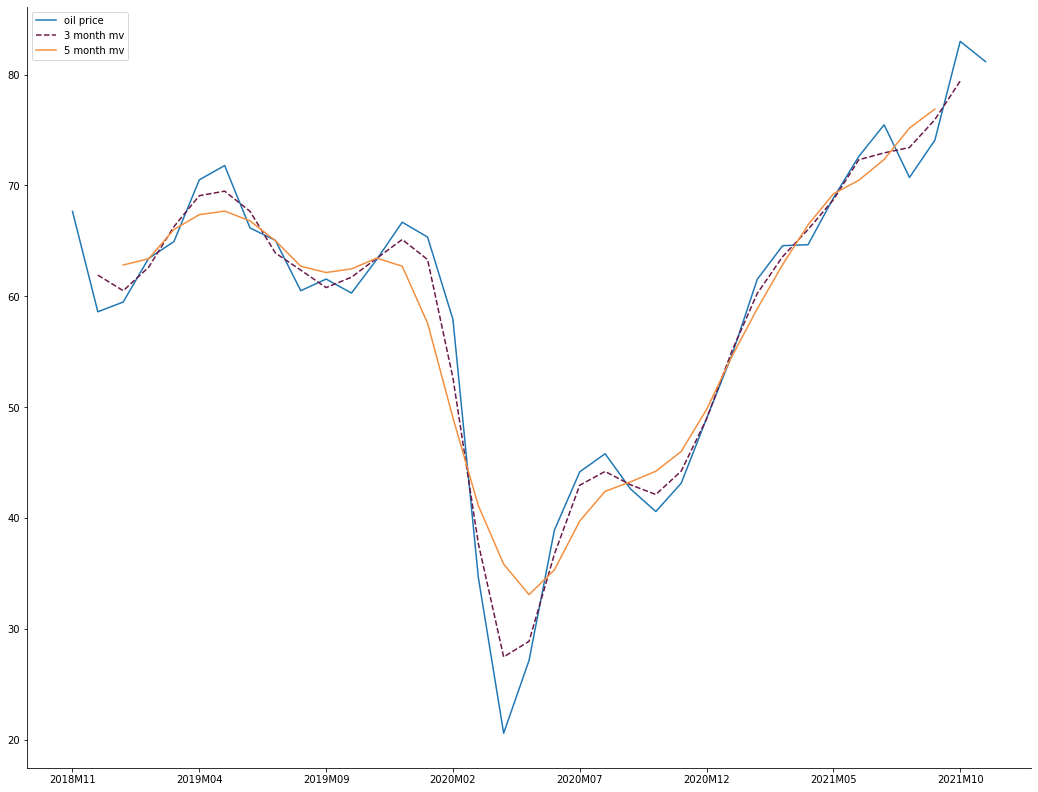

In [90]:
fig, ax = plt.subplots(figsize = (18,14));           # ax is needed for some functions
ax.spines[["top", "right"]].set_visible(False) # remove axis
ax.plot(oil_rev["oil prices"], label="oil price")
ax.plot(oil_rev["3 month moving average"], ls="--", color='#6A1848', label="3 month mv")
ax.plot(oil_rev["5 month moving average"], ls="-", color="#F38F3E", label="5 month mv")

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 38, 5))

plt.legend(loc="best")
plt.show()